In [ ]:
import os
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/archive.zip"

In [ ]:
import zipfile

extract_path = "/content/drive/MyDrive/Colab Notebooks/extraxt_archive"
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
names = []
for name in os.listdir(extract_path):
  # Remove file extension and any parenthesized numbers
  base_name = os.path.splitext(name)[0]
  base_name = base_name.split('(')[0].strip()
  # Split by underscore and take the first part
  class_name = base_name.split('_')[0]
  names.append(class_name)

classes = Counter(names)

In [ ]:
classes

Counter({'anadenanthera': 20,
         'arecaceae': 35,
         'arrabidaea': 35,
         'cecropia': 35,
         'chromolaena': 35,
         'combretum': 35,
         'croton': 35,
         'dipteryx': 35,
         'eucalipto': 35,
         'faramea': 35,
         'hyptis': 35,
         'mabea': 35,
         'matayba': 35,
         'mimosa': 35,
         'myrcia': 35,
         'protium': 35,
         'qualea': 35,
         'schinus': 35,
         'senegalia': 35,
         'serjania': 35,
         'syagrus': 35,
         'tridax': 35,
         'urochloa': 35})

In [ ]:
len(names)

790

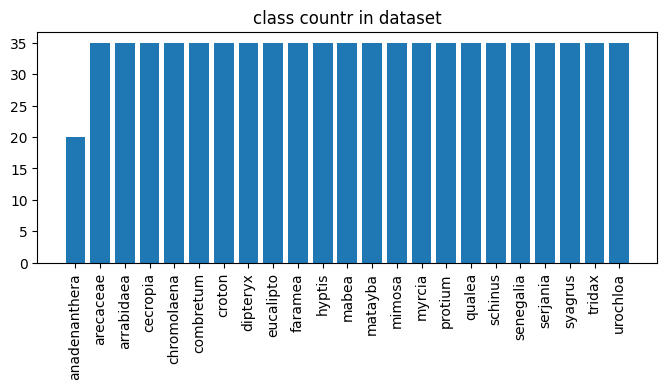

In [ ]:
plt.figure(figsize=(8,3))
plt.title('class countr in dataset')
plt.bar(*zip(*classes.items()))
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
extracted_archive_path = "/content/drive/MyDrive/Colab Notebooks/extraxt_archive/"
path_class={key:[] for key in classes.keys() }
for root, dirs, files in os.walk(extracted_archive_path):
    for name in files:
        if name.endswith('.jpg'): # Assuming images are in jpg format
            # Construct the full path to the file
            full_path = os.path.join(root, name)
            # Remove file extension and any parenthesized numbers from the filename for key extraction
            base_name = os.path.splitext(name)[0]
            base_name = base_name.split('(')[0].strip()
            # Split by underscore and take the first part as the key
            key = base_name.split('_')[0]
            if key in path_class: # Add this check to ensure key exists
                path_class[key].append(full_path)

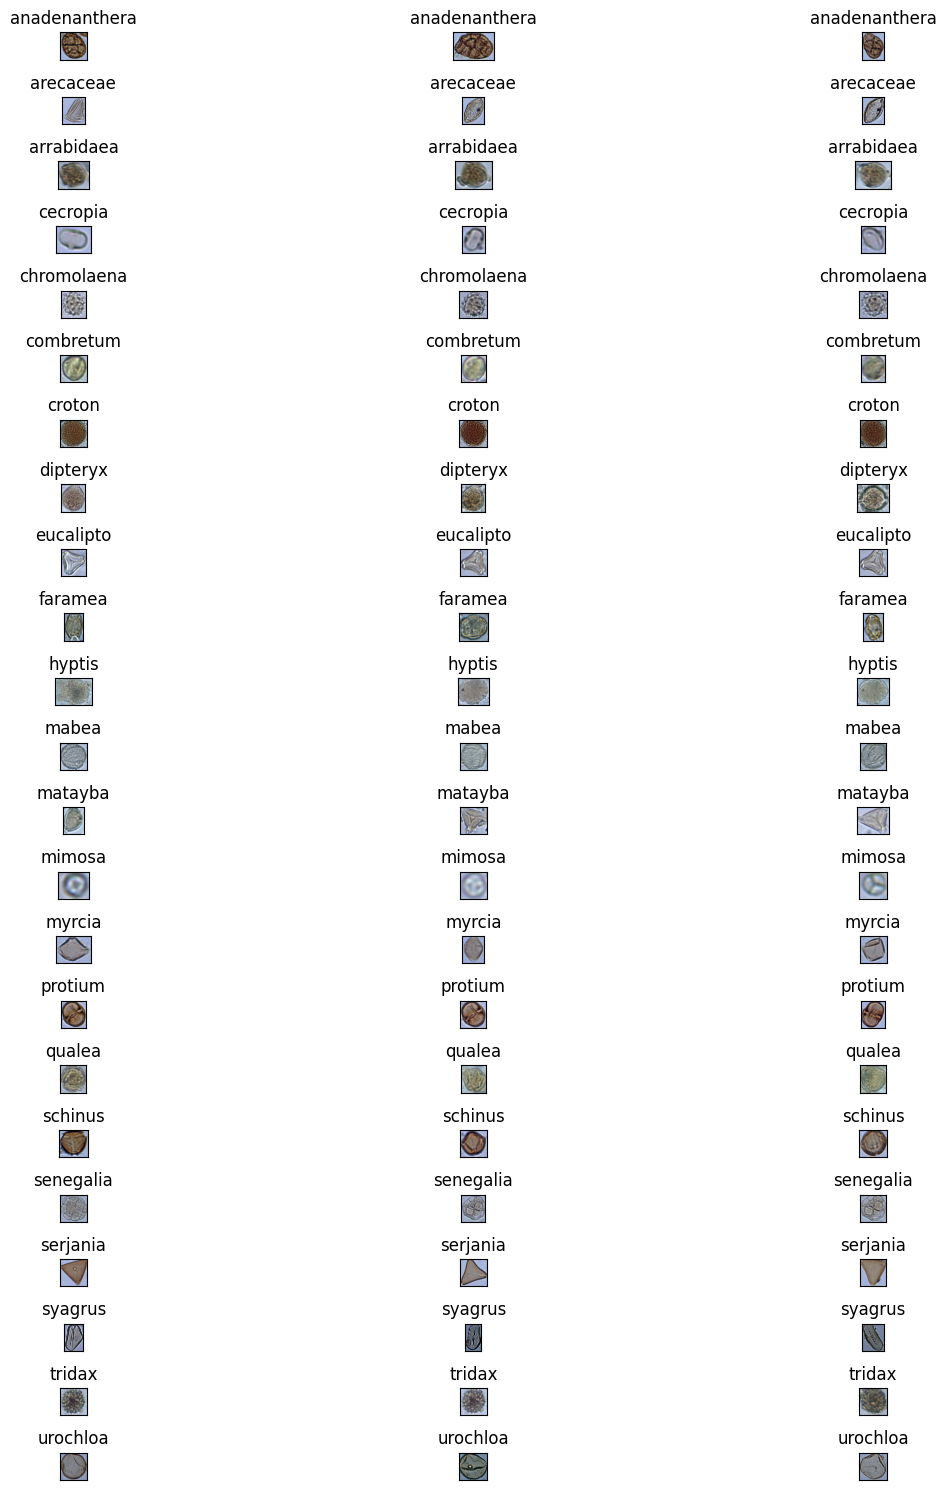

In [ ]:
fig=plt.figure(figsize=(15,15))
for i,key in enumerate(path_class.keys()):
    # Display up to the first 3 images for each class
    for j in range(min(len(path_class[key]), 3)):
        img = Image.open(path_class[key][j])
        ax=fig.add_subplot(len(classes), 3, i*3 + j + 1, xticks=[], yticks=[])
        ax.imshow(img)
        ax.set_title(key)

plt.tight_layout()
plt.show()

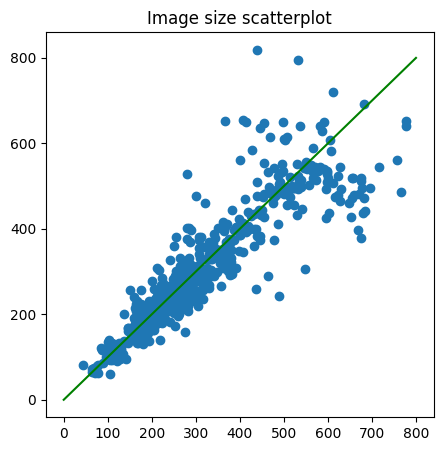

In [ ]:
size = []
for class_name, image_paths in path_class.items():
    for path in image_paths:
        img = cv2.imread(path)
        if img is not None:
            size.append(img.shape)

x,y,_=zip(*size)

fig=plt.figure(figsize=(5,5))
plt.scatter(x,y)
plt.title("Image size scatterplot")

plt.plot([0,800],[0,800],'g')
plt.show()

In [ ]:
def process_img(img,size=(128,128)):
  img= cv2.resize(img,size)
  img=img/255
  return img

In [ ]:
x, y = [], []
for class_name, image_paths in path_class.items():
    for path in image_paths:
        img = cv2.imread(path)
        if img is not None:
            processed_img = process_img(img)
            x.append(processed_img)
            y.append(class_name)

x = np.array(x)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
le=LabelEncoder()
y_le=le.fit_transform(y)
y_cat=to_categorical(y_le,23)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_cat,test_size=0.285,stratify=y_le)
print("Images in each class in test set:{}".format(np.sum(y_test,axis=0)))

Images in each class in test set:[ 6. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10.]


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

input_shape = x_train[0].shape
output_shape = 23

model = Sequential()
model.add(Conv2D(filters=16,kernel_size= 3, activation='relu', input_shape=input_shape,padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size= 2, activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size= 2, activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128,kernel_size= 2, activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(500,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(output_shape,activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │     4,096,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        75,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 23)             │         3,473 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,218,803 (16.09 MB)

 Trainable params: 4,218,803 (16.09 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])
print('Model is compiled')

Model is compiled


In [ ]:
datagener=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)
datagener.fit(x_train)

In [ ]:
batch_size=4
epochs=500

model_path='cnn.keras'
callbecks=[EarlyStopping(monitor='val_loss',patience=20),ModelCheckpoint(filepath=model_path,save_best_only=True)]
history=model.fit(
    datagener.flow(x_train,y_train,batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size, # Corrected steps_per_epoch
    epochs=epochs,
    validation_data=(x_train,y_train),
    callbacks=callbecks,
    verbose=1)

Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 26s 165ms/step - accuracy: 0.0407 - loss: 3.1457 - val_accuracy: 0.0443 - val_loss: 3.1319
Epoch 2/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 42s 172ms/step - accuracy: 0.0446 - loss: 3.1341 - val_accuracy: 0.0514 - val_loss: 3.0793
Epoch 3/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 40s 167ms/step - accuracy: 0.0932 - loss: 2.9607 - val_accuracy: 0.1099 - val_loss: 2.6664
Epoch 4/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 24s 169ms/step - accuracy: 0.0926 - loss: 2.7055 - val_accuracy: 0.1294 - val_loss: 2.5552
Epoch 5/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 41s 170ms/step - accuracy: 0.1058 - loss: 2.6891 - val_accuracy: 0.1862 - val_loss: 2.4791
Epoch 6/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 23s 163ms/step - accuracy: 0.1225 - loss: 2.5192 - val_accuracy: 0.2199 - val_loss: 2.3636
Epoch 7/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 23s 164ms/step - accuracy: 0.1738 - loss: 2.4482 - val_accuracy: 0.1684 - val_loss: 2.3017
Epoch 8/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 22s 157ms/step - accuracy: 0.1564 - loss: 2.372

In [ ]:
model.load_weights(model_path)
score = model.evaluate(x_test,y_test,verbose=0)
print('Test set accuracy:{}'.format(score[1]))

Test set accuracy:0.8628318309783936


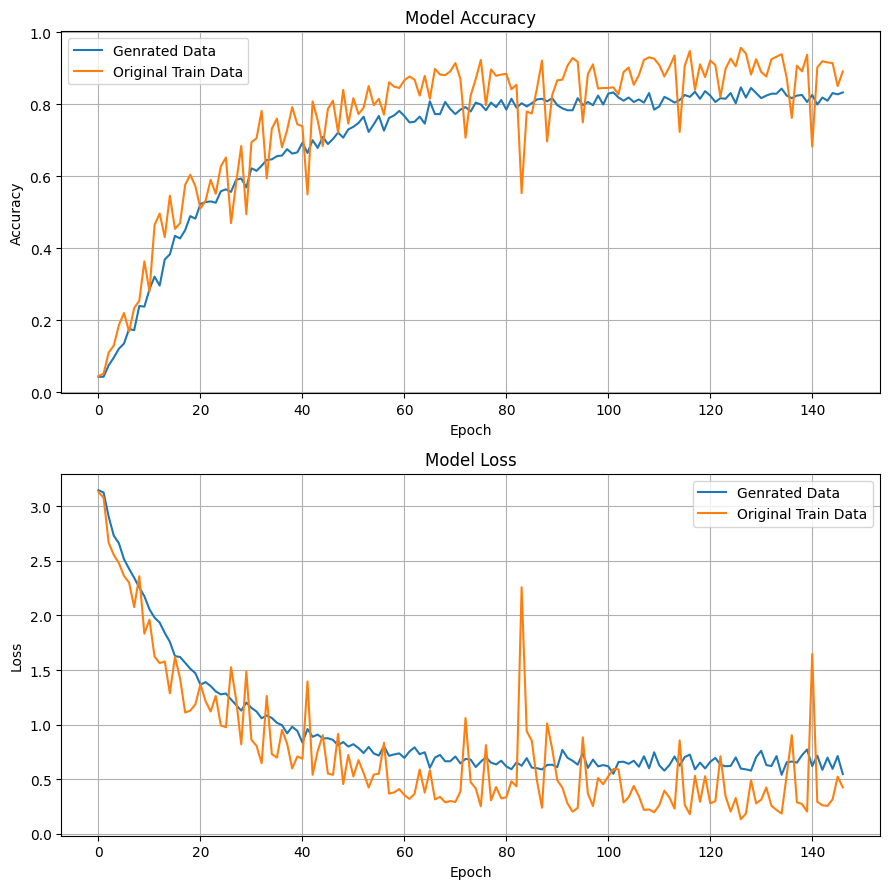

In [ ]:
plt.figure(figsize=(9, 9))

# Subplot for Accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Genrated Data')
plt.plot(history.history['val_accuracy'], label='Original Train Data')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Subplot for Loss
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Genrated Data')
plt.plot(history.history['val_loss'], label='Original Train Data')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

save the model

In [ ]:
from tensorflow.keras.models import load_model

model.save('my_model.keras')
model=load_model('my_model.keras')

Test the model

In [ ]:
from keras.preprocessing.image import load_img, img_to_array

img=load_img('/content/drive/MyDrive/Colab Notebooks/tridax_30.jpg',target_size=(128,128))
img=img.resize((128,128))
x=img_to_array(img)
x=np.expand_dims(x,axis=0)
a=np.argmax(model.predict(x),axis=1)
# Use the classes from the LabelEncoder to map the prediction index to the class name
index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
'11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
'21', '22', '23'
]
result=str(index[a[0]])
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


'2'

In [ ]:
op=['syagrus','tridax','arecaceae','eucalipto','schinus','serjania','matayba','faramea','anadenanthera','mimosa','chromolaena','mabea',
'arrabidaea','qualea','myrcia','dipteryx', 'protium','croton','combretum','hyptis','urochloa' ,'cecropia','senegalia']
result=op[a[0]]
result

'tridax'

In [ ]:
img= load_img('/content/drive/MyDrive/Colab Notebooks/tridax_30.jpg',target_size=(128, 128))

img=img.resize((128, 128))
#Convert to array and preprocess

x=img_to_array(img)

x= np.expand_dims(x, axis=0)

a= np.argmax(model.predict(x), axis=1)

Index=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17','18','19','20','21','22','23']

result=str(index[a[0]])

result

op=['syagrus','tridax','arecaceae','eucalipto','schinus','serjania','matayba','faramea','anadenanthera','mimosa','chromolaena','mabea',
'arrabidaea','qualea','myrcia','dipteryx', 'protium','croton','combretum','hyptis', 'urochloa','cecropia','senegalia']

result =op[a[0]]

print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
tridax


In [ ]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/tridax_30.jpg',target_size=(128,128))
img=img.resize((128,128))
x=img_to_array(img)
x=np.expand_dims(x,axis=0)
class_names=['syagrus','tridax','arecaceae','eucalipto','schinus','serjania','matayba','faramea','anadenanthera','mimosa','chromolaena','mabea',
'arrabidaea','qualea','myrcia','dipteryx', 'protium','croton','combretum','hyptis', 'urochloa','cecropia','senegalia']
y_pred=model.predict(x)
class_idx=np.argmax(y_pred,axis=1)[0]
class_name=class_names[class_idx]
print("predicted index:",class_idx)
print("predicted class",class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
predicted index: 1
predicted class tridax
